# CC5067NT Smart Data Discovery Course Work

## `2. Data Preparation`

### ● Write a python program to merge data from each month into one CSV and read in updated dataframe.

**For my course work I have used the [GitHub](https://github.com/KabinChongbang/SmartDataDiscoveryCourseWorkData) to store and access all the CSV sale files. For that I have to used the url and file name to access the data. This can take a little bit of few seconds to combine all the data.**

In [1]:
from pandas import read_csv
import pandas as pd

# Set the GitHub repository URL and CSV file names
repo_url = "https://raw.githubusercontent.com/KabinChongbang/SmartDataDiscoveryCourseWorkData/master/"
csv_files = ["Sales_January_2019.csv", "Sales_February_2019.csv", "Sales_March_2019.csv", "Sales_April_2019.csv",
             "Sales_May_2019.csv", "Sales_June_2019.csv", "Sales_July_2019.csv", "Sales_August_2019.csv", 
             "Sales_September_2019.csv", "Sales_October_2019.csv", "Sales_November_2019.csv", 
             "Sales_December_2019.csv" ]

# Create an empty list to store the combined data frames
data_frames = []

# Loop through each CSV file and append its data to the data_frames list
for file in csv_files:
    url = f"{repo_url}/{file}"
    dataset = read_csv(url)
    data_frames.append(dataset)

# Concatenate all the data frames into a single data frame
combined_data = pd.concat(data_frames, ignore_index=True)

combined_data.shape

(186850, 6)

**Now the merge data from each month is converted into single one CSV file.**

In [2]:
#Export the combined data frame to a single CSV file
combined_data.to_csv('combined_sales_data.csv', index=False)

### ● Write a python program to remove the NaN missing values from updated dataframe. 

**Displaying many number of NaN missing values in each columns.**

In [3]:
# isna() function is used to detect missing values. 
# This function return the bool values for each element in dataframe and counted all by using sum() function in it.
combined_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

**Droping the NaN values and displaying the column stats.**

In [4]:
# dropna() function is used to remove the missing values.
combined_data = combined_data.dropna()
combined_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### ● Write a python program to convert Quantity Ordered and Price Each to numeric. 

**Display the data type of all the columns.**

In [5]:
# Return the dtypes in the DataFrame.
combined_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**Converting the Quantity Ordered and Price Each column to numeric.**

In [6]:
# to_numeric function is used to convert the passed argument to a numeric type.
# errors is set to coerce for invalid parsing which will be set as NaN.
# Float number is downcasted to smallest float dtype as most of the data are small.  
combined_data['Quantity Ordered'] = pd.to_numeric(combined_data['Quantity Ordered'], errors='coerce',
downcast="float")
combined_data['Price Each'] = pd.to_numeric(combined_data['Price Each'], errors='coerce', downcast="float")
combined_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float32
Price Each          float32
Order Date           object
Purchase Address     object
dtype: object

**Droping the NaN values and displaying the column stats.**

In [7]:
combined_data.isna().sum()

Order ID              0
Product               0
Quantity Ordered    355
Price Each          355
Order Date            0
Purchase Address      0
dtype: int64

In [8]:
# dropna() function is used to remove the missing values.
combined_data = combined_data.dropna()
combined_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### ● Create a new column named Month from Ordered Date of updated dataframe and convert it to integer as data type. 

**Since the Order Date column is in Object datatype. It has to be converted into Date datatype.**

In [9]:
# to_numeric function is used to convert the passed argument to a datetime dtype.
# errors is set to coerce for invalid parsing which will be set as NaN.
# dropna() function is used to remove the missing values.
combined_data['Order Date'] = pd.to_datetime(combined_data['Order Date'], errors='coerce').dropna()
combined_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

**Creating a new column name Month in integer of data as month of Order.**

In [10]:
# dt.month is used to return the month of datetime dtype.
combined_data['Month'] = combined_data['Order Date'].dt.month
combined_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

### ● Create a new column named City from Purchase Address based on the value in updated dataframe.

**Creating a new column name City and setting its data as name of citys.**

In [11]:
# This fucntion will strip the middle part from data and return the name of citys.
def get_city_name(address):
    words = address.split(",")
    if len(words) >= 2:
        return words[1].strip()
    else:
        return ""

# Creating the new column and applying the function to data of Purchase Address column.
combined_data['City'] = combined_data['Purchase Address'].apply(get_city_name).dropna()

In [12]:
# Displaying the final data at the end of data preparation section.
combined_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland
2,141236,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237,27in FHD Monitor,1.0,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin
5,141239,AAA Batteries (4-pack),1.0,2.990000,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,San Francisco
6,141240,27in 4K Gaming Monitor,1.0,389.989990,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",1,Los Angeles
7,141241,USB-C Charging Cable,1.0,11.950000,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",1,San Francisco
8,141242,Bose SoundSport Headphones,1.0,99.989998,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",1,Los Angeles
9,141243,Apple Airpods Headphones,1.0,150.000000,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",1,San Francisco


## `3. Data Analysis`

### ● Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable. 

**Displaying the variable which can be describe on statistics mostly integer values.**

In [13]:
# Using describe() method to return description of the dataframe.
combined_data.describe()

,Quantity Ordered,Price Each,Month
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399719,7.059140
std,0.442793,332.731323,3.502996
min,1.000000,2.990000,1.000000
25%,1.000000,11.950000,4.000000
50%,1.000000,14.950000,7.000000
75%,1.000000,150.000000,10.000000
max,9.000000,1700.000000,12.000000


**Creating a get_statistics function to display the statistics of any chosen variable.**

In [29]:
# Import the kurtosis function from the scipy.stats library
from scipy.stats import kurtosis

# Define a function named get_statistics that takes a variable as an argument
def get_statistics(variable):
    print(f"{variable}:")
    
    # Define a tuple of statistical functions to be applied to the variable
    stats_functions = (
        combined_data[variable].sum, 
        combined_data[variable].mean,
        combined_data[variable].std, 
        combined_data[variable].skew,
        combined_data[variable].kurtosis
    )
    
    # For each of the functions in the tuple, apply the function to the combined_data DataFrame,
    # and print the name of the function and the result.
    for func in stats_functions:
        print(func.__name__, "=", func())
        
get_statistics("Month")

Month:
sum = 1312647
mean = 7.059139553643453
std = 3.5029960006289613
skew = -0.08858776558911155
kurt = -1.29355484266831


### ● Write a Python program to calculate and show correlation of all variables. 

**Calculating the correlation of all variable.**

In [15]:
# corr() method is used to finds the correlation of each column in a DataFrame.
# numeric_only=True parameter is used to calculate the numeric value only.
combined_data.corr(numeric_only=True)

,Quantity Ordered,Price Each,Month
Quantity Ordered,1.000000,-0.148272,0.000791
Price Each,-0.148272,1.000000,-0.003375
Month,0.000791,-0.003375,1.000000


**Creating a find_corr function to display the correlation of any chosen variable.**

In [16]:
# Define a function named find_corr that takes a target as an argument
def find_corr(target):
    
    # Compute the dataframe using the pandas 'corr' function
    corr = combined_data.corr(numeric_only=True)
    
    # Sort correlations in descending order, exclude self-correlation
    return corr[target].sort_values(ascending=False)[1:]

find_corr('Price Each')

Month              -0.003375
Quantity Ordered   -0.148272
Name: Price Each, dtype: float64

## `4. Data Exploration`

### ● Which Month has the best sales? and how much was the earning in that month? Make a bar graph of sales as well. 

**The month which have the best sales.**

In [17]:
# Import the calender to use the month_name attribute of the calendar module to get the word value of the month
# corresponding to month_num. 
import calendar

# Calculate the total cost of each order and group the data by month, then sum the total cost for each month.
combined_data['total_cost'] = combined_data['Quantity Ordered'].mul(combined_data['Price Each'])
monthly_total_sales = combined_data.groupby("Month")["total_cost"].sum()

# Find the month with the highest total sales and print its name.
print(f"The month which have the best sales is {calendar.month_name[monthly_total_sales.idxmax()]}.")

The month which have the best sales is December.


**Displaying all the sales in months.**

In [18]:
monthly_total_sales

Month
1     1822256.75
2     2202022.50
3     2807100.25
4     3390670.25
5     3152606.75
6     2577802.25
7     2647775.75
8     2244467.75
9     2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: total_cost, dtype: float32

**The value of earning in the best sales month.**

In [19]:
print(f"The value of earning in the best sales month: ${monthly_total_sales.max()}")

The value of earning in the best sales month: $4613443.5


**Bar graph of sales in all 12 months.**

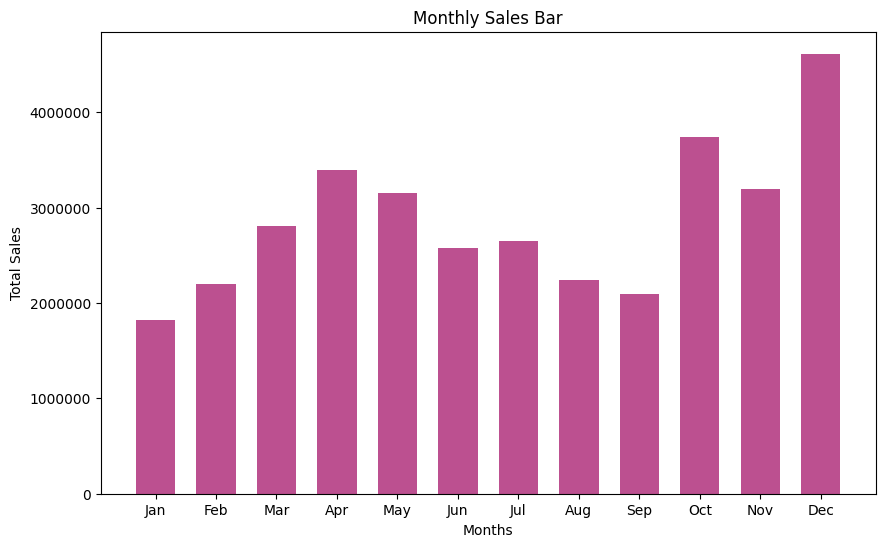

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime

# Create a list of abbreviated month names
# By looping twelve time to extract using strftime('%b') 
month_names = [datetime.date(2023, i, 23).strftime('%b') for i in range(1, 13)]

# Create a figure with size 10x6 inches
plt.figure(figsize=(10,6))

# Plot the data using a bar chart
plt.bar(range(1, 13), monthly_total_sales, color="#bc5090", width=0.65)

# Set the x-axis tick labels to the month names
plt.xticks(range(1, 13), month_names)

# Set the label for the x-axis, y-axis and title of the plot
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Bar')

# Format the y-axis ticks

# Define the format string for the y-axis ticks
fmt = '%.f'  # no decimal places
# Create a FormatStrFormatter object with the format string
yticks = mtick.FormatStrFormatter(fmt)
# Set the y-axis tick formatter to the FormatStrFormatter object
plt.gca().yaxis.set_major_formatter(yticks)


plt.show()

### ● Which city has sold the highest product?

**The city who has sold the highest product.**

In [21]:
# Group the data by City and sum the Quantity Ordered column for each group
city_total_sales = combined_data.groupby("City")["Quantity Ordered"].sum()

# Find the city with the highest total sales and print its name.
print(f"The City which have the best sales is {city_total_sales.idxmax()}.")

The City which have the best sales is San Francisco.


**Displaying all the sales in Citys.**

In [22]:
print(city_total_sales.sort_values(ascending=False))

City
San Francisco    50239.0
Los Angeles      33289.0
New York City    27932.0
Boston           22528.0
Dallas           16730.0
Atlanta          16602.0
Seattle          16553.0
Portland         14053.0
Austin           11153.0
Name: Quantity Ordered, dtype: float32


**Bar graph of sales in all unique citys.**

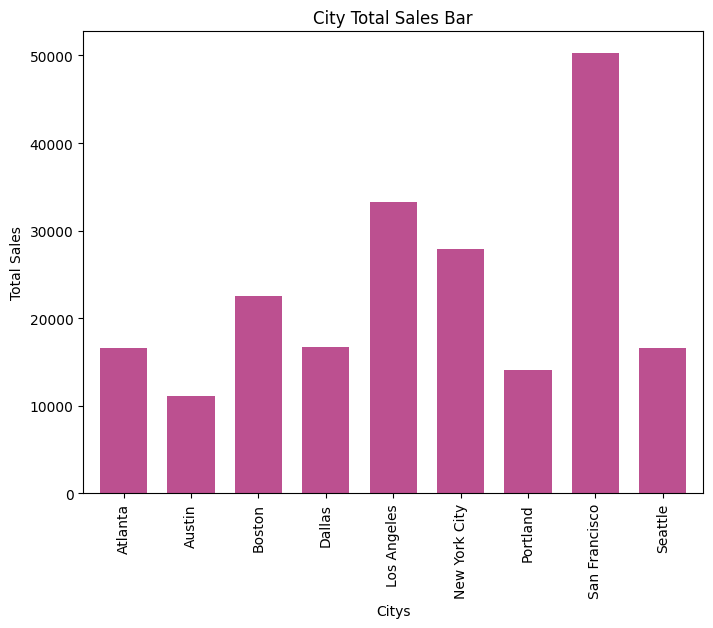

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create a figure with size 8x6 inches
plt.figure(figsize=(8,6))

# Plot the data using a bar chart
city_total_sales.plot(kind='bar', color="#bc5090", width=0.7)

# Set the label for the x-axis, y-axis and title of the plot
plt.xlabel('Citys')
plt.ylabel('Total Sales')
plt.title('City Total Sales Bar')


# Format the y-axis ticks

# Define the format string for the y-axis ticks
fmt = '%.f'  # no decimal places
# Create a FormatStrFormatter object with the format string
yticks = mtick.FormatStrFormatter(fmt)
# Set the y-axis tick formatter to the FormatStrFormatter object
plt.gca().yaxis.set_major_formatter(yticks)

plt.show()

### ● Which product was sold the most in overall? Illustrate it through bar graph.

**The Product which is sold highest number of time.**

In [24]:
# Group the data by product and sum the Quantity Ordered column for each group
total_sales_of_product_by_number = combined_data.groupby("Product")["Quantity Ordered"].sum()

# Print the name of the best-selling product and its total quantity sold
print(f"""The product that was sold the most overall was {total_sales_of_product_by_number.idxmax()} with a 
total quantity sold of {total_sales_of_product_by_number.max()}.""")

The product that was sold the most overall was AAA Batteries (4-pack) with a 
total quantity sold of 31017.0.


**Displaying all the Number of sales of Products.**

In [25]:
print(total_sales_of_product_by_number.sort_values(ascending=False))

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity Ordered, dtype: float32


**Bar graph of Number of sales in all unique products.**

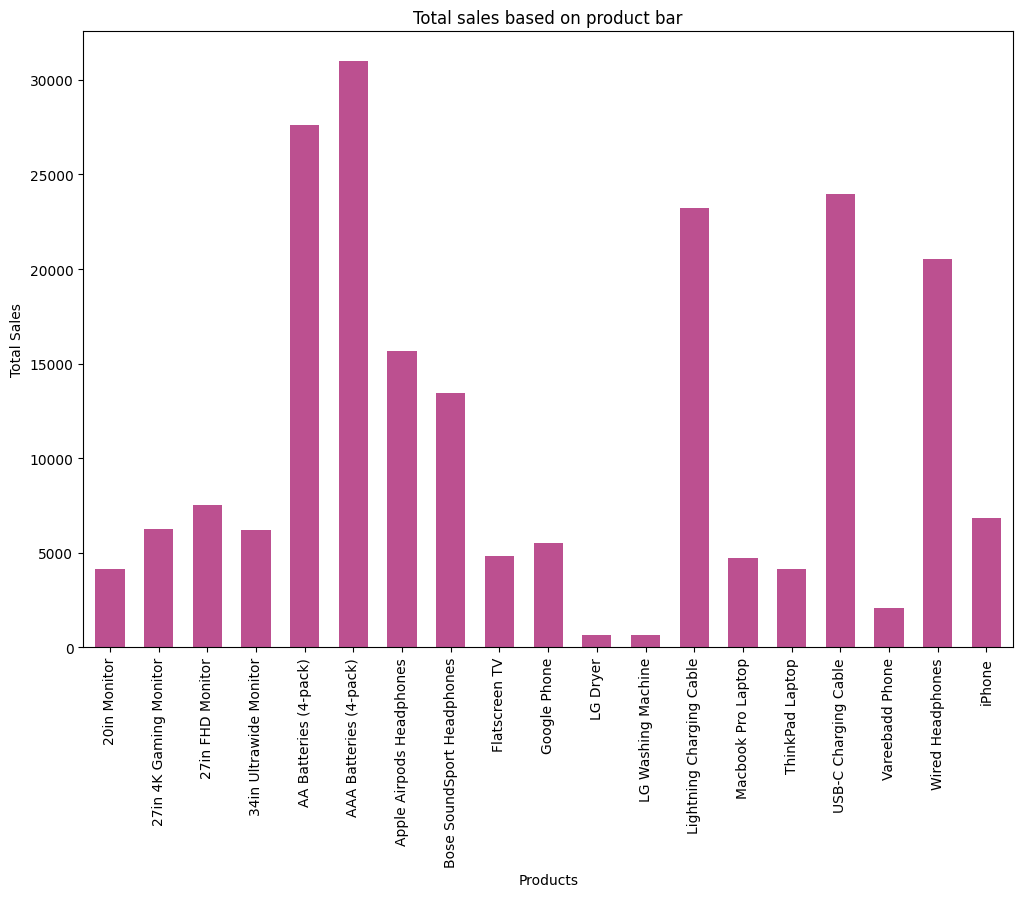

In [26]:
import matplotlib.ticker as mtick

# Create a figure with size 12x8 inches
plt.figure(figsize=(12,8))

# Plot the data using a bar chart
total_sales_of_product_by_number.plot(kind='bar', color="#bc5090", width=0.6)

# Set the label for the x-axis, y-axis and title of the plot
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.title('Total sales based on product bar')

# Format the y-axis ticks

# Define the format string for the y-axis ticks
fmt = '%.f'  # no decimal places
# Create a FormatStrFormatter object with the format string
yticks = mtick.FormatStrFormatter(fmt)
# Set the y-axis tick formatter to the FormatStrFormatter object
plt.gca().yaxis.set_major_formatter(yticks)

plt.show()

### ● Write a Python program to show histogram plot of any chosen variables. Use proper labels in the graph.

**Name of all the variable to show histogram.**

In [27]:
print("Here are all the variables which can be use to show histogram:")
print("\n".join([f"{i+1}. {col}" for i, col in enumerate(combined_data.columns)]))
print("Note: Some of the variables like 'Order ID', 'Order Date' and 'Purchase Address' take vast period of time!")

Here are all the variables which can be use to show histogram:
1. Order ID
2. Product
3. Quantity Ordered
4. Price Each
5. Order Date
6. Purchase Address
7. Month
8. City
9. total_cost
Note: Some of the variables like 'Order ID', 'Order Date' and 'Purchase Address' take vast period of time!


**Funtion for ploting Histogram of each variables.**

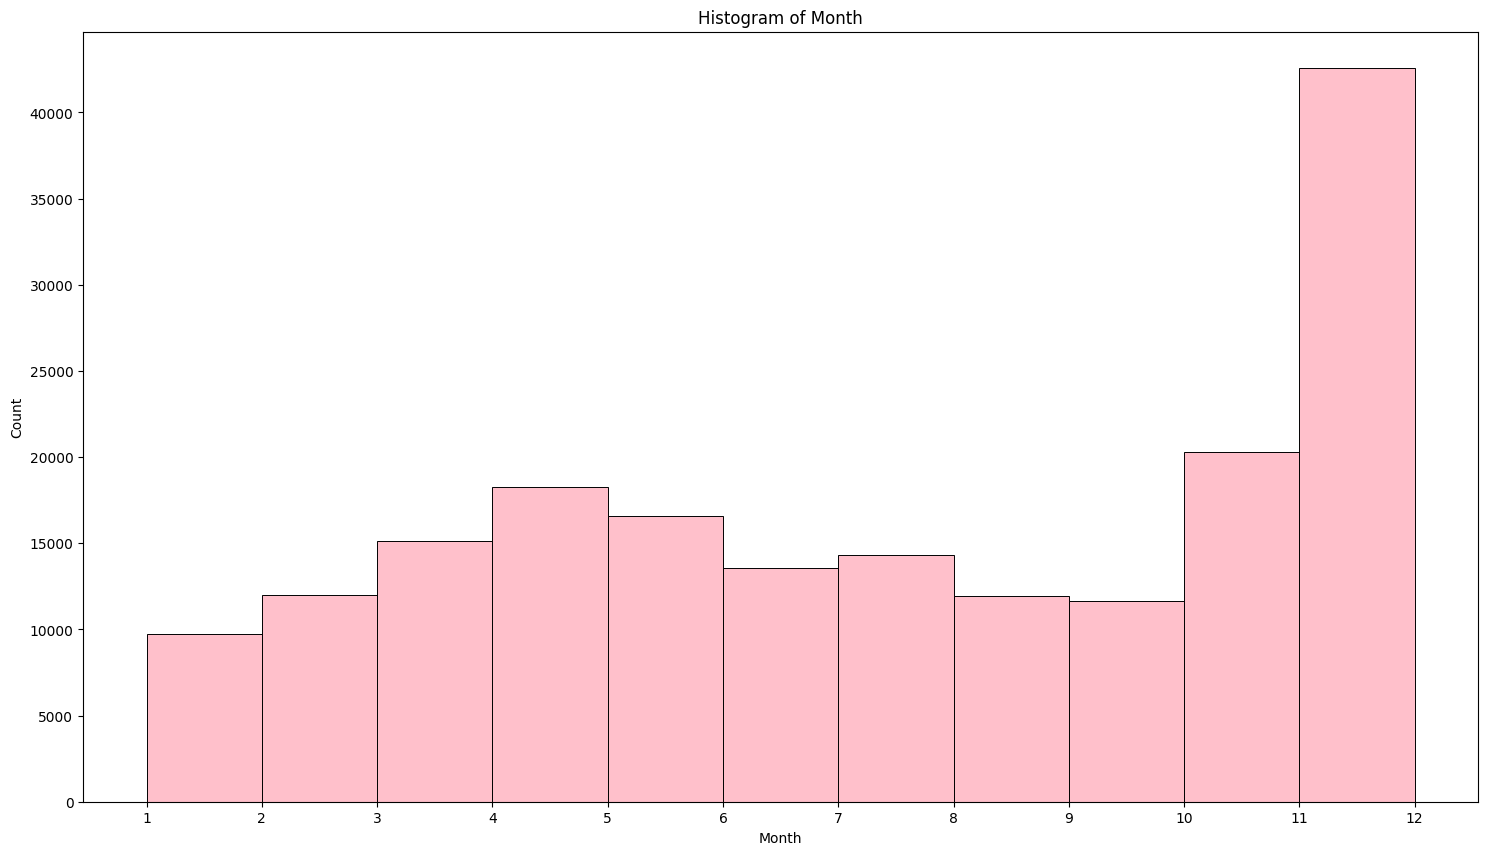

In [28]:
import matplotlib.pyplot as plt

# Define a function to plot a histogram for the given column name.
def plot_hist(call):
    # Using try-except for better error detection.
    try:
        # Create a new figure with size 18x8 inches
        plt.figure(figsize=(18,10))
        
        # Plot the histogram with the specified bins, color, edgecolor, and linewidth
        bins = plt.hist(combined_data[f"{call}"], bins= len(combined_data[f"{call}"].unique()) - 1,
                color="pink", edgecolor="black", linewidth=0.7) 
        # Set the xticks to match the bin edges
        plt.xticks(bins[1])
        
        # Set the ylabel, xlabel, and title of the plot
        plt.ylabel('Count')
        plt.xlabel(f'{call}')
        plt.title(f'Histogram of {call}')
        
        plt.show()
        
    except Exception as e:
        # Print an error message if an exception is raised
        print('Error occurred: ' + str(e))
    
plot_hist("Month")